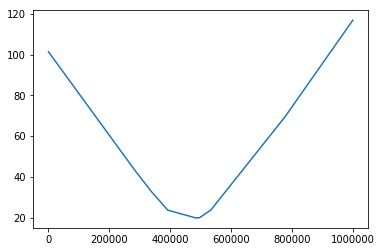

-0.1742600001826915

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random value between -5 to 5
def gen_vector(n):
    return [ (random.random() - 0.5) * 10 for i in range(10) ]

def objective(x, y, b):
    return np.linalg.norm(b*x - y, ord=1)
#random.seed(163)

n = 20
x = np.array(gen_vector(n))
y = np.array(gen_vector(n))

beta_list = np.arange(-5.0, 5.0, 0.00001)

obj = np.array([ objective(x, y, b) for b in beta_list ] )

plt.plot(obj)
plt.show()

b_optimal = beta_list[np.argmin(obj)]

b_optimal

In [2]:
def num_der(x, y, b, d):
    return (objective(x, y, b+d) - objective(x, y, b-d)) / (2*d)

# Small number used to computer derivative
d = 0.0001

# Initial guess
beta = random.uniform(-5.0, 5.0)
beta = 0.5
# Learning rate
r = 1.0 / 20 * 0.01

init_slope = num_der(x, y, beta, d)
init_sign = np.sign(init_slope)
next_slope = int(init_slope)
next_sign = init_sign
while (next_sign == init_sign):
    beta = beta - r * next_slope
    next_slope = num_der(x, y, beta, d)
    next_sign = int(np.sign(next_slope))
    
beta

-0.17419302991461694